In [51]:
import matplotlib.pyplot as plt 
import pandas as pd
from trainer import trainer
from sklearn.metrics import balanced_accuracy_score,f1_score,roc_auc_score,brier_score_loss,RocCurveDisplay,PrecisionRecallDisplay

#### Import validation data

In [7]:
# External
external=pd.read_pickle("./Data/validForModel.pkl")

In [8]:
outvalidX=external.loc[:,['basegrd','baseucva','familyHistory','basesef']]
outvalidy=external.loc[:,"outcome"]

In [32]:
mytrainer=trainer.load_model("./Model_1707286618.pkl")
catboost=mytrainer.get_best_estimator()['cat']
pred=catboost.predict(outvalidX)
yprob=catboost.predict_proba(outvalidX)[:,1]

In [18]:
ytrue=outvalidy.to_numpy().astype(int)

In [33]:
acc=balanced_accuracy_score(ytrue,pred)
f1=f1_score(ytrue,pred,average="weighted")
auc_=roc_auc_score(ytrue,yprob)
bs=brier_score_loss(ytrue,yprob)
print("外部测试数据结果:")
print(f"Acc={acc:.2f}\nF1={f1:.2f}\nAUC={auc_:.2f}\nBrier score={bs:.2f}")

外部测试数据结果:
Acc=0.82
F1=0.87
AUC=0.88
Brier score=0.14


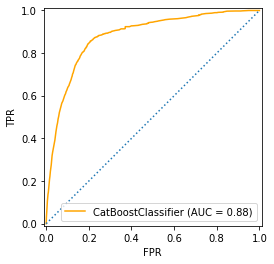

In [53]:
fig,ax=plt.subplots(nrows=1,ncols=1)
RocCurveDisplay.from_estimator(catboost,outvalidX,outvalidy,ax=ax,color="orange")
ax.plot([0,1],[0,1],linestyle=":")
ax.set(xlabel="FPR",ylabel="TPR")
fig.savefig("./Plots/auc_validation.jpg",dpi=300)

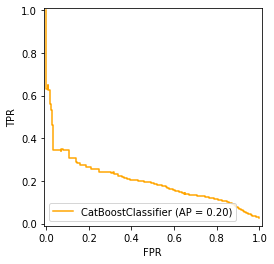

In [54]:
fig,ax=plt.subplots(nrows=1,ncols=1)
PrecisionRecallDisplay.from_estimator(catboost,outvalidX,outvalidy,ax=ax,color="orange")
ax.set(xlabel="FPR",ylabel="TPR")
fig.savefig("./Plots/pr_valid.jpg",dpi=300)